### Data exploratory analysis

In [541]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [542]:
url = r'https://raw.githubusercontent.com/MSI17819/Berlin_bike_theft_prediction/main/Berlin_bike_thief_file_for_analysis.csv'

df = pd.read_csv(url, sep=',', encoding="utf-8")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32270 entries, 0 to 32269
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Record_date              32270 non-null  object
 1   Record_day               32270 non-null  int64 
 2   Record_month             32270 non-null  int64 
 3   Record_year              32270 non-null  int64 
 4   Stealing_date            32270 non-null  object
 5   Stealing_hour            32270 non-null  int64 
 6   Report_stealing_date     32270 non-null  object
 7   Report_stealing_hour     32270 non-null  int64 
 8   Berlin_code_area         32270 non-null  int64 
 9   Bike_value               32270 non-null  int64 
 10  Unsuccesful_attempt      32270 non-null  object
 11  Bike_type                32270 non-null  object
 12  Crime_type               32270 non-null  object
 13  Crime_reason             32270 non-null  object
 14  Administrative_district  32270 non-nul

#### Creat DataFrame copy for next visualisation analysis

In [543]:
df

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,2022-08-07,7,8,2022,2022-08-07,14,2022-08-07,15,3500933,4000,No,Men,Theft,Aggravated theft,Pankow,Südliches Weißensee,Weißensee,Weißer See
1,2022-08-07,7,8,2022,2022-08-07,18,2022-08-07,18,8100415,0,No,Women,Theft,Aggravated theft,Neukölln,Neukölln,Rixdorf,Ganghoferstraße
2,2022-08-07,7,8,2022,2022-08-07,11,2022-08-07,15,10200627,2224,No,Women,Theft,Aggravated theft,Marzahn-Hellersdorf,Hellersdorf,Hellersdorf Süd,Am Kienberg
3,2022-08-07,7,8,2022,2022-08-06,13,2022-08-06,16,11401137,899,No,Men,Theft,Aggravated theft,Lichtenberg,Lichtenberg Mitte,Friedrichsfelde Süd,Erieseering
4,2022-08-07,7,8,2022,2022-08-06,11,2022-08-07,8,11501339,5800,No,Bike,Theft,Aggravated theft,Lichtenberg,Lichtenberg Süd,Karlshorst,Karlshorst West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32265,2021-01-02,2,1,2021,2021-01-01,12,2021-01-02,15,11300826,377,No,Women,Theft,Aggravated theft,Lichtenberg,Lichtenberg Nord,Frankfurter Allee Süd,Frankfurter Allee Süd
32266,2021-01-01,1,1,2021,2021-01-01,9,2021-01-01,11,4200206,290,No,Women,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Charlottenburg West,Heerstraße,Kranzallee
32267,2021-01-01,1,1,2021,2021-01-01,5,2021-01-01,8,10400941,2527,No,Bike,Break-in,Aggravated theft from basement/floor,Marzahn-Hellersdorf,Kaulsdorf/Mahlsdorf,Mahlsdorf,Pilgramer Straße
32268,2021-01-01,1,1,2021,2021-01-01,20,2021-01-01,20,2100104,2800,No,Men,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz


In [544]:
df_copy = df.copy()

#### Display DataFrame copy

#### Change Record_day column for verbal day representation 

In [545]:
df_copy['Record_day'] = pd.to_datetime(df_copy['Record_date']).dt.day_name()

In [546]:
df_copy.groupby('Record_day')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Record_day,
Monday,5519
Tuesday,5159
Wednesday,5136
Thursday,4861
Friday,4434
Sunday,3752
Saturday,3409


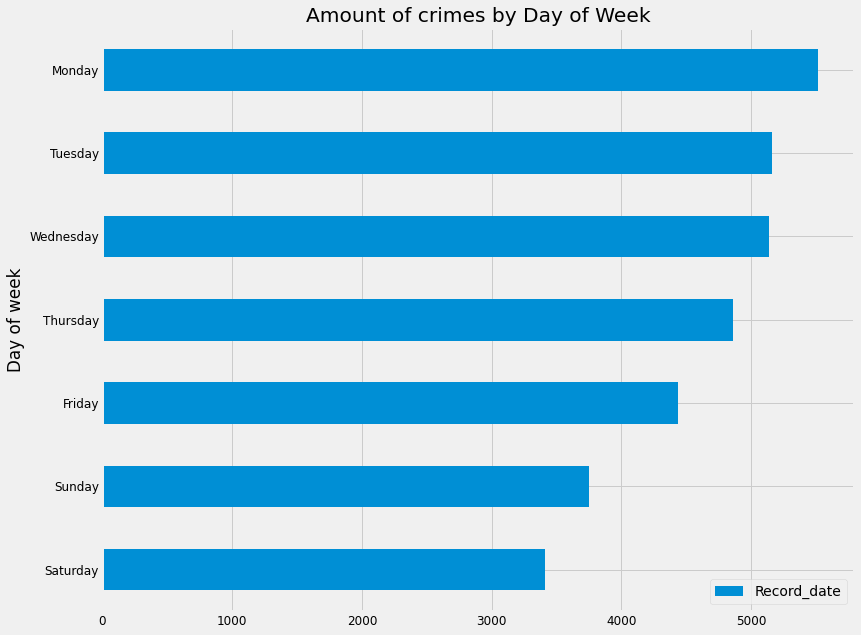

In [547]:
df_copy.groupby('Record_day')[['Record_date']].count()\
                .sort_values(by='Record_date', ascending=True)\
                .plot(kind='barh',
                figsize=(12,10),
                fontsize=12,
                title='Amount of crimes by Day of Week',
                xlabel='Day of week',
                grid=True);

In [548]:
df_copy.groupby('Administrative_district')[['Record_date']].count().sort_values(by=['Record_date'], ascending=False)

,Record_date
Administrative_district,
Pankow,5079
Mitte,4552
Friedrichshain-Kreuzberg,4438
Charlottenburg-Wilmersdorf,3527
Tempelhof-Schöneberg,2699
Treptow-Köpenick,2529
Neukölln,2517
Steglitz-Zehlendorf,2041
Lichtenberg,1803


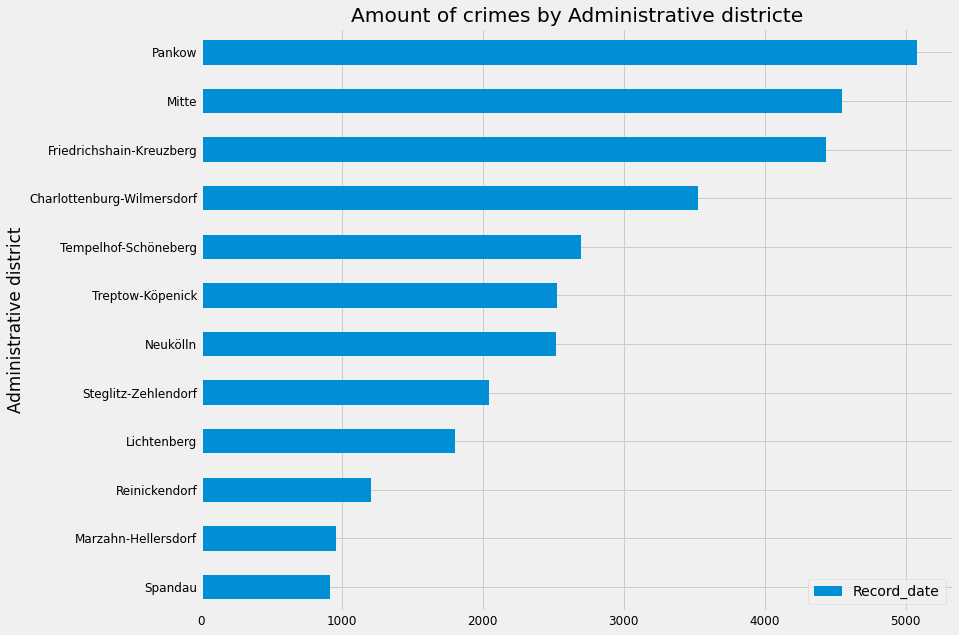

In [549]:
df_copy.groupby('Administrative_district')[['Record_date']].count()\
                                    .sort_values(by=['Record_date'], ascending=True)\
                                    .plot(kind='barh',
                                    figsize=(12,10),
                                    fontsize=12,
                                    title='Amount of crimes by Administrative districte',
                                    xlabel='Administrative district',
                                    grid=True);

In [550]:
df_copy.groupby('Bike_type')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Bike_type,
Men,14870
Women,9416
Bike,4807
Mountain,1418
Child,1265
Racing,447
Cargo,47


In [551]:
df_copy.groupby('Crime_type')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Crime_type,
Theft,30874
Break-in,1396


#### Drop column *Record_date*

In [552]:
df.drop(["Record_date"], axis=1, inplace=True)

#### Change datetime column type to numeric

In [553]:
df['Stealing_date'] = pd.to_numeric(pd.to_datetime(df['Stealing_date']))
df['Report_stealing_date'] = pd.to_numeric(pd.to_datetime(df['Report_stealing_date']))

#### Change all column type *object* to DataFrame *category* 

In [554]:
df[[col for col in df.columns if df[col].dtypes == object]] = \
df[[col for col in df.columns if df[col].dtypes == object]].astype('category')

### Machine Learning prediction modeling

In [555]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, StandardScaler, OneHotEncoder

In [556]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import statistics
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import matthews_corrcoef, average_precision_score
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTETomek 

#### Split data to 70% train and 30% test (the size of dataset is big almost 31 thousand)

In [557]:
X = df.drop(['Unsuccesful_attempt'], axis=1)
y = df['Unsuccesful_attempt']

In [558]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 0)

#### Transform data to acceptable form for Machine Learning algoritm

In [559]:
transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(handle_unknown='ignore', sparse=False), [9, 10, 11, 12, 13, 14, 15]),
    ('trf2', StandardScaler(), [0, 1, 2, 3, 4, 5, 6])], 
    remainder='passthrough')

X_train = transformer.fit_transform(X_train)

X_test = transformer.transform(X_test)

#### Transform y-variable by LabelEncoder for two classes (0 and 1)
##### Project assume crime prediction, but in dataset more than 99% are crime, and only 1% are no crime (*Unsucessfuly_attempt column*). Due to this fact, y-variable are reverse encoding. No crime treat as 0 (normal situation), crime treat as 1 (unnormal situation) 
- Crime unhappend *(Unsucessfuly attempt == Yes)* = label with number 0 
- Crime happend *(Unsucessfuly attempt == No)* = label with number 1 

In [570]:
le = preprocessing.LabelEncoder()

y_train = 1 - le.fit_transform(y_train)

le.transform(y_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [571]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

##### Dataset is highly unbalanced:
- 31 706 record are crime *(Unsuccesful_attempt" == No, so crime happend) - label 1*
- 110 record are not crime *(Unsuccesful_attempt" == Yes, so crime unhappend) - label 0*

In [517]:
df["Unsuccesful_attempt"].value_counts()

No     32159
Yes      111
Name: Unsuccesful_attempt, dtype: int64

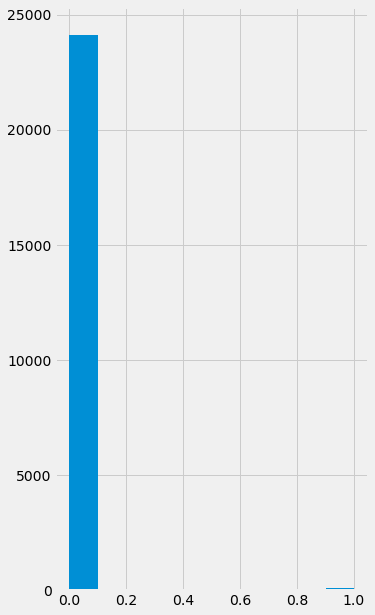

In [566]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(5, 10))
plt.hist(y_train)
plt.show()

### SMOTE *(Synthetic minority oversampling technique)* application for minority class
#### According to literature SMOTE is better then ordinar oversampling method because algoritm create new data with *information*, contraty ordinar oversampling creat new data by duplicated data from minority class without *information* component  
##### Preventing data leakage, SMOTE application is restric only for train dataset

In [519]:
smote = SMOTE()
X_train_oversample, y_train_oversample = smote.fit_resample(X_train, y_train)

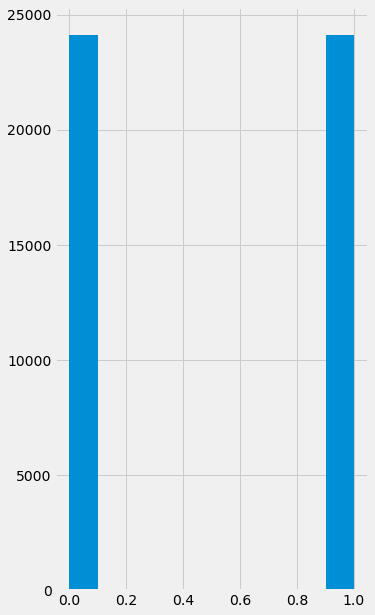

In [520]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(5, 10))
plt.hist(y_train_oversample)
plt.show()

##### Creat simply baseline model with the use a mode statistics, for simply class prediction. This model act as our basline for other ML prediction models

In [429]:
baseline_model = statistics.mode(y_train)

y_pred_baseline_model = [baseline_model] * len(y_test)

score_baseline_model = accuracy_score(y_test, y_pred_baseline_model)

print(f'Accuracy score {round(score_baseline_model * 100, 2)}%')

Accuracy score 99.6%
